## Step 1 Data Processing

In [61]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
ls '/content/gdrive/My Drive/data/cats-dogs'

test/  train/  validation/


In [0]:
train_dir = '/content/gdrive/My Drive/data/cats-dogs/train/'
test_dir = '/content/gdrive/My Drive/data/cats-dogs/test/'
validation_dir = '/content/gdrive/My Drive/data/cats-dogs/validation/'

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

## Step 2 Model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 43808)             0         
__________

## Step 3 Compile the Model

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

## Step 4 Train the Model

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [77]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='binary')

Found 1000 images belonging to 2 classes.


In [78]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='binary')

Found 1000 images belonging to 2 classes.


In [79]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 29s 288ms/step - loss: 0.6953 - acc: 0.5075 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 2/10
100/100 [==============================] - 26s 259ms/step - loss: 0.6835 - acc: 0.5515 - val_loss: 0.7645 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 26s 261ms/step - loss: 0.6733 - acc: 0.5815 - val_loss: 0.6634 - val_acc: 0.5980
Epoch 4/10
100/100 [==============================] - 26s 259ms/step - loss: 0.6602 - acc: 0.6065 - val_loss: 0.6549 - val_acc: 0.6180
Epoch 5/10
100/100 [==============================] - 26s 262ms/step - loss: 0.6428 - acc: 0.6350 - val_loss: 0.6510 - val_acc: 0.6180
Epoch 6/10
100/100 [==============================] - 26s 257ms/step - loss: 0.6311 - acc: 0.6410 - val_loss: 0.6392 - val_acc: 0.6400
Epoch 7/10
100/100 [==============================] - 26s 261ms/step - loss: 0.6216 - acc: 0.6625 - val_loss: 0.6212 - val_acc: 0.6480
Epoch 8/10
100/100 [==============================] - 2

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

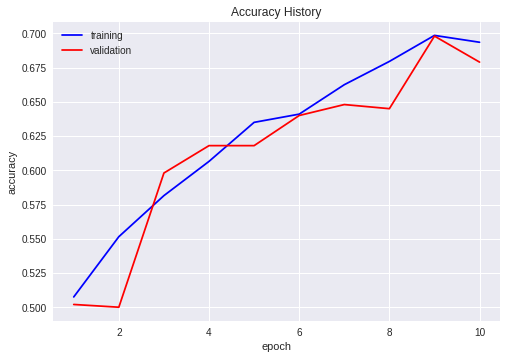

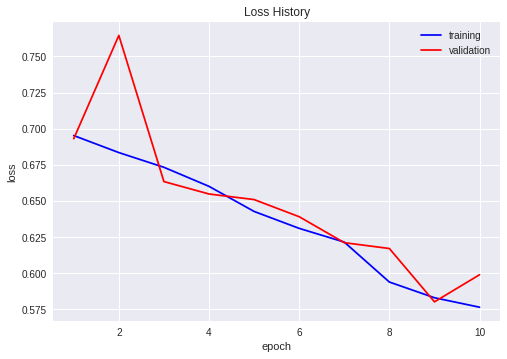

In [81]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])

plt.show()

In [0]:
|